In [71]:
path = "data/sub01/func/sess01/run01/fnirs_data.npy"
path = "data/sub01/func/sess01/run01/fnirs_data/data_src0.npy"
import numpy as np
d = np.load(path)
d.shape

(32, 188)

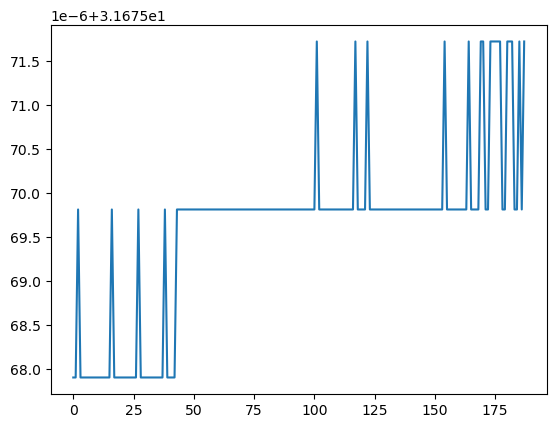

In [75]:
import matplotlib.pyplot as plt
plt.plot(d[0])

In [3]:
times = np.arange(d.shape[-1]) * 1.6
times

array([  0. ,   1.6,   3.2,   4.8,   6.4,   8. ,   9.6,  11.2,  12.8,
        14.4,  16. ,  17.6,  19.2,  20.8,  22.4,  24. ,  25.6,  27.2,
        28.8,  30.4,  32. ,  33.6,  35.2,  36.8,  38.4,  40. ,  41.6,
        43.2,  44.8,  46.4,  48. ,  49.6,  51.2,  52.8,  54.4,  56. ,
        57.6,  59.2,  60.8,  62.4,  64. ,  65.6,  67.2,  68.8,  70.4,
        72. ,  73.6,  75.2,  76.8,  78.4,  80. ,  81.6,  83.2,  84.8,
        86.4,  88. ,  89.6,  91.2,  92.8,  94.4,  96. ,  97.6,  99.2,
       100.8, 102.4, 104. , 105.6, 107.2, 108.8, 110.4, 112. , 113.6,
       115.2, 116.8, 118.4, 120. , 121.6, 123.2, 124.8, 126.4, 128. ,
       129.6, 131.2, 132.8, 134.4, 136. , 137.6, 139.2, 140.8, 142.4,
       144. , 145.6, 147.2, 148.8, 150.4, 152. , 153.6, 155.2, 156.8,
       158.4, 160. , 161.6, 163.2, 164.8, 166.4, 168. , 169.6, 171.2,
       172.8, 174.4, 176. , 177.6, 179.2, 180.8, 182.4, 184. , 185.6,
       187.2, 188.8, 190.4, 192. , 193.6, 195.2, 196.8, 198.4, 200. ,
       201.6, 203.2,

In [4]:
events_path = "sub-01_ses-nsd01_task-nsdcore_run-01_events.tsv"
import pandas as pd
df = pd.read_csv(events_path, sep="\t")

In [5]:
df

,onset,duration,trial_type,response_time,trial_number,73k_id,10k_id,time,is_correct,change_mind,memory_recent,memory_first,is_old_session,is_correct_session,total_novel_presses,total_old_presses,response,missing_data
0,12,3,0,0.803530,1,46003,626,0.505082,1,0,NaN,NaN,0,1,1,0,1,0
1,16,3,0,0.972261,2,61883,5013,0.505128,1,0,NaN,NaN,0,1,1,0,1,0
2,20,3,0,0.742351,3,829,4850,0.505175,1,0,NaN,NaN,0,1,1,0,1,0
3,24,3,0,0.747518,4,67574,8823,0.505221,1,0,NaN,NaN,0,1,1,0,1,0
4,28,3,0,0.547423,5,16021,9538,0.505267,1,0,NaN,NaN,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,264,3,0,0.804705,59,3372,7046,0.507998,1,0,NaN,NaN,0,1,1,0,1,0
59,268,3,0,1.277743,60,17953,1607,0.508045,1,0,NaN,NaN,0,1,1,0,1,0
60,272,3,0,0.777353,61,31928,2132,0.508091,1,0,NaN,NaN,0,1,1,0,1,0
61,276,3,0,0.750955,62,50006,5352,0.508137,1,0,NaN,NaN,0,1,1,0,1,0


In [8]:
def make_first_level_design_matrix(frame_times, conditions, onsets, stim_dur=1.,
                                   hrf_model='glover',
                                   drift_model='cosine',
                                   high_pass=0.01, drift_order=1,
                                   fir_delays=[0], add_regs=None,
                                   add_reg_names=None, min_onset=-24,
                                   oversampling=50):
    from nilearn.glm.first_level import make_first_level_design_matrix
    from pandas import DataFrame

    # frame_times = raw.times

    # Create events for nilearn
    # conditions = raw.annotations.description
    # onsets = raw.annotations.onset - raw.first_time
    duration = stim_dur * np.ones(len(conditions))
    events = DataFrame({'trial_type': conditions,
                        'onset': onsets,
                        'duration': duration})

    dm = make_first_level_design_matrix(frame_times, events,
                                        drift_model=drift_model,
                                        drift_order=drift_order,
                                        hrf_model=hrf_model,
                                        min_onset=min_onset,
                                        high_pass=high_pass,
                                        add_regs=add_regs,
                                        oversampling=oversampling,
                                        add_reg_names=add_reg_names,
                                        fir_delays=fir_delays)
    return dm

In [47]:
dm = make_first_level_design_matrix(times, df["trial_number"], df["onset"])
dm.shape

(188, 70)

In [49]:
dm

,1,2,3,4,5,6,7,8,9,10,...,61,62,63,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,constant
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.103139,0.103128,0.103110,0.103085,0.103052,0.103013,1.0
1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.103110,0.103013,0.102851,0.102624,0.102333,0.101978,1.0
3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.103052,0.102782,0.102333,0.101705,0.100900,0.099919,1.0
4.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.102966,0.102437,0.101558,0.100332,0.098763,0.096856,1.0
6.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.102851,0.101978,0.100529,0.098511,0.095937,0.092821,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.004330,-0.023814,-0.049972,-0.102851,0.101978,-0.100529,0.098511,-0.095937,0.092821,1.0
294.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.001875,-0.013021,-0.044572,-0.102966,0.102437,-0.101558,0.100332,-0.098763,0.096856,1.0
296.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000758,-0.006393,-0.030646,-0.103052,0.102782,-0.102333,0.101705,-0.100900,0.099919,1.0
297.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000289,-0.002875,-0.017877,-0.103110,0.103013,-0.102851,0.102624,-0.102333,0.101978,1.0


In [1]:
from nilearn.glm.first_level import make_first_level_design_matrix

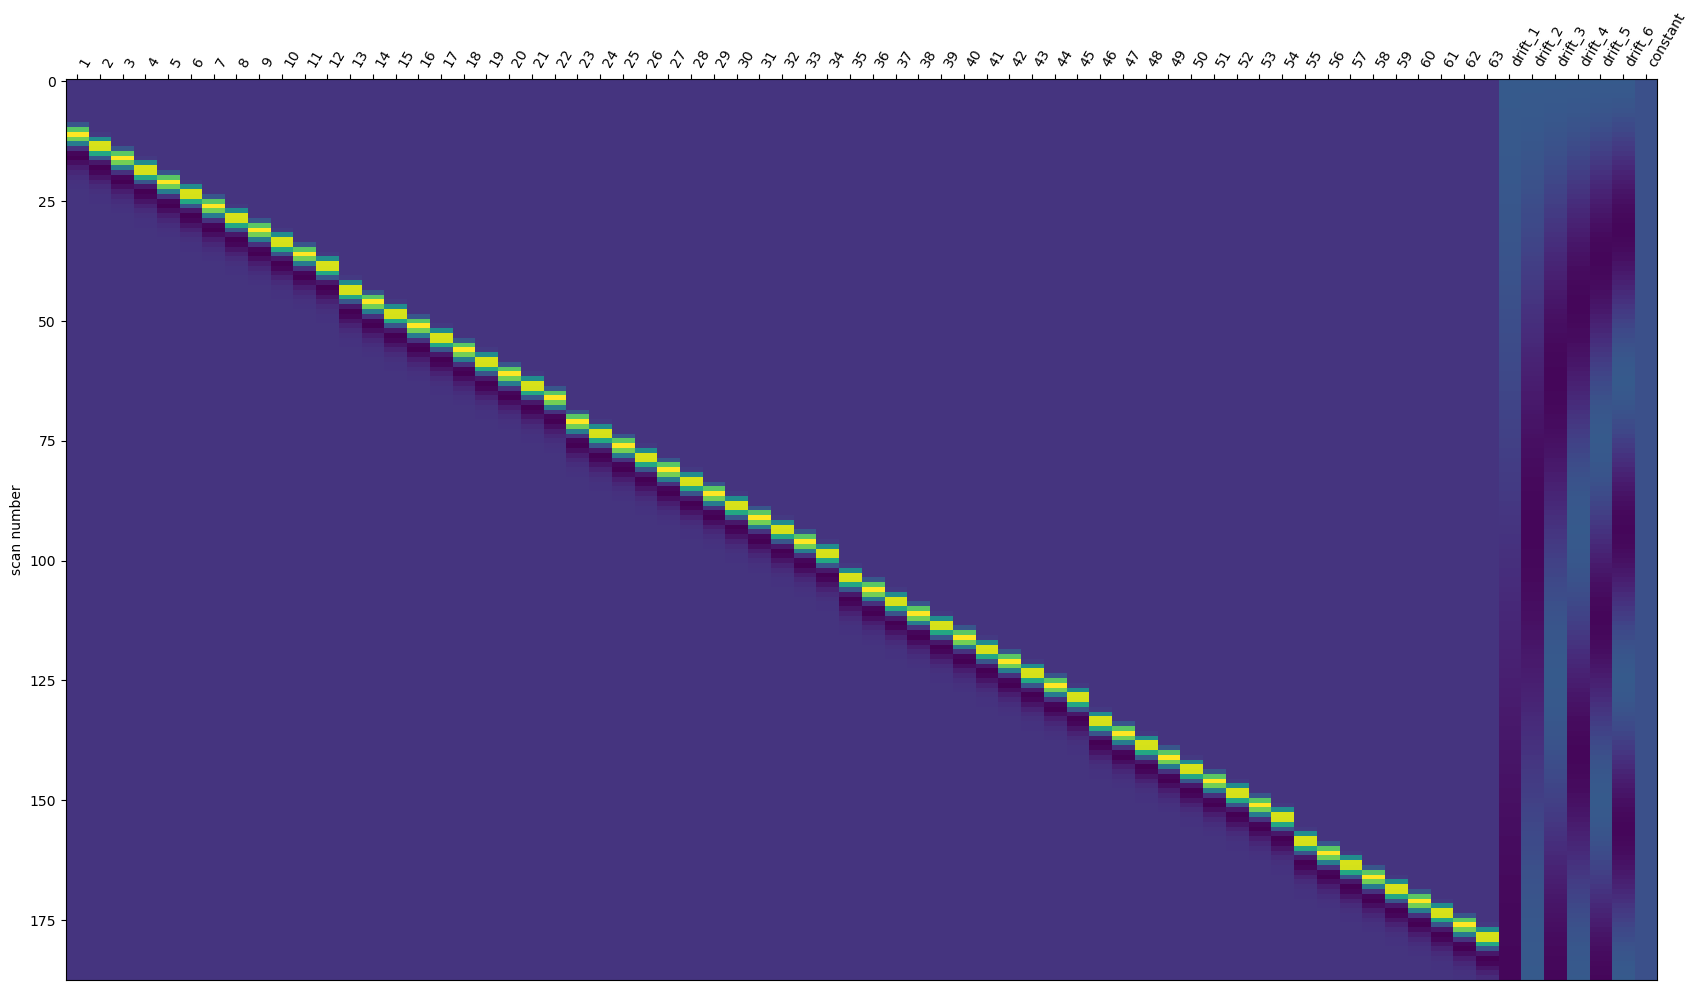

In [58]:
from nilearn.plotting import plot_design_matrix
plot_design_matrix(dm)  
import matplotlib.pyplot as plt
plt.savefig("test.png")

In [16]:
from mne_nirs.statistics import run_glm

In [65]:
dm.shape

(188, 70)

In [17]:
import nilearn.glm
from nilearn.glm.first_level import run_glm as nilearn_glm

In [68]:
def run_glm(raw, design_matrix, noise_model='ar1', bins=0,
            n_jobs=1, verbose=0):
    # picks = _picks_to_idx(raw.info, 'fnirs', exclude=[], allow_empty=True)
    # ch_names = raw.ch_names

    # if noise_model == 'auto':
    #     noise_model = f"ar{int(np.round(raw.info['sfreq'] * 4))}"

    # if bins == 0:
    #     bins = len(raw.ch_names)
    num_channels = raw.shape[0]
    bins = num_channels
    
    results = dict()
    for i in range(num_channels):
        print(i)
        try:
            labels, glm_estimates = nilearn_glm(raw[i:i+1].T,
                                                # raw.get_data(pick).T,
                                                design_matrix.values[:, :60],
                                                noise_model=noise_model, bins=bins,
                                                n_jobs=n_jobs, verbose=verbose)
            results[i] = glm_estimates[labels[0]]
        except Exception as e:
            print("failed on channel {}: {}".format(i, e))
    return results
    # return RegressionResults(raw.info, results, design_matrix)

In [69]:
d.shape
data = d.reshape(-1, d.shape[-1])
data.shape

(5120, 188)

In [70]:
results = run_glm(data, dm)

0
1
failed on channel 1: Singular matrix
2
3
failed on channel 3: Singular matrix
4
5
6
failed on channel 6: Singular matrix
7
failed on channel 7: Singular matrix
8
9
10
failed on channel 10: Singular matrix
11
12
13
14
15
failed on channel 15: Singular matrix
16


KeyboardInterrupt: 

In [27]:
data.T.shape, dm.values.shape

((188, 5120), (188, 69))

In [41]:
results[0]

In [43]:
results[0].theta.shape

(69, 1)

In [51]:
dm.columns

Index([         1,          2,          3,          4,          5,          6,
                7,          8,          9,         10,         11,         12,
               13,         14,         15,         16,         17,         18,
               19,         20,         21,         22,         23,         24,
               25,         26,         27,         28,         29,         30,
               31,         32,         33,         34,         35,         36,
               37,         38,         39,         40,         41,         42,
               43,         44,         45,         46,         47,         48,
               49,         50,         51,         52,         53,         54,
               55,         56,         57,         58,         59,         60,
               61,         62,         63,  'drift_1',  'drift_2',  'drift_3',
        'drift_4',  'drift_5',  'drift_6', 'constant'],
      dtype='object')

In [53]:
import glob
fnirs_data_files = glob.glob('data/**/fnirs_data.npy', recursive=True)
fnirs_data_files


['data/sub01/func/sess02/run12/fnirs_data.npy',
 'data/sub01/func/sess02/run01/fnirs_data.npy',
 'data/sub01/func/sess02/run06/fnirs_data.npy',
 'data/sub01/func/sess02/run08/fnirs_data.npy',
 'data/sub01/func/sess02/run09/fnirs_data.npy',
 'data/sub01/func/sess02/run07/fnirs_data.npy',
 'data/sub01/func/sess02/run10/fnirs_data.npy',
 'data/sub01/func/sess02/run11/fnirs_data.npy',
 'data/sub01/func/sess02/run05/fnirs_data.npy',
 'data/sub01/func/sess02/run02/fnirs_data.npy',
 'data/sub01/func/sess02/run03/fnirs_data.npy',
 'data/sub01/func/sess02/run04/fnirs_data.npy',
 'data/sub01/func/sess03/run12/fnirs_data.npy',
 'data/sub01/func/sess03/run01/fnirs_data.npy',
 'data/sub01/func/sess03/run06/fnirs_data.npy',
 'data/sub01/func/sess03/run08/fnirs_data.npy',
 'data/sub01/func/sess03/run09/fnirs_data.npy',
 'data/sub01/func/sess03/run07/fnirs_data.npy',
 'data/sub01/func/sess03/run10/fnirs_data.npy',
 'data/sub01/func/sess03/run11/fnirs_data.npy',
 'data/sub01/func/sess03/run05/fnirs_dat

In [54]:
len(fnirs_data_files)

39

In [56]:
import os
os.path.split(fnirs_data_files[0])

('data/sub01/func/sess02/run12', 'fnirs_data.npy')